<a href="https://colab.research.google.com/github/UICHANLEE/2023_DataScience/blob/ML/4%EC%9E%A5_%EB%B6%84%EB%A5%98_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 분류(Classification)의 개요

- 나이브 베이즈
- 로지스틱 회귀 (중요)
- 결정트리
- 서포터 벡터 머신 (판다스 데이터 분석 part7장)
- 최소근접 알고리즘
- 신경망
- 앙상블

## 결정트리
- 직관적으로 이해하기 쉬운 알고리즘
- 자동으로 트리기반의 분류 규칙을 만듦

- min_samples_split : 과적합 제어
- max_features : 최대 피처 갯수
- max_depth : 트리의 최대깊이를 규정

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)

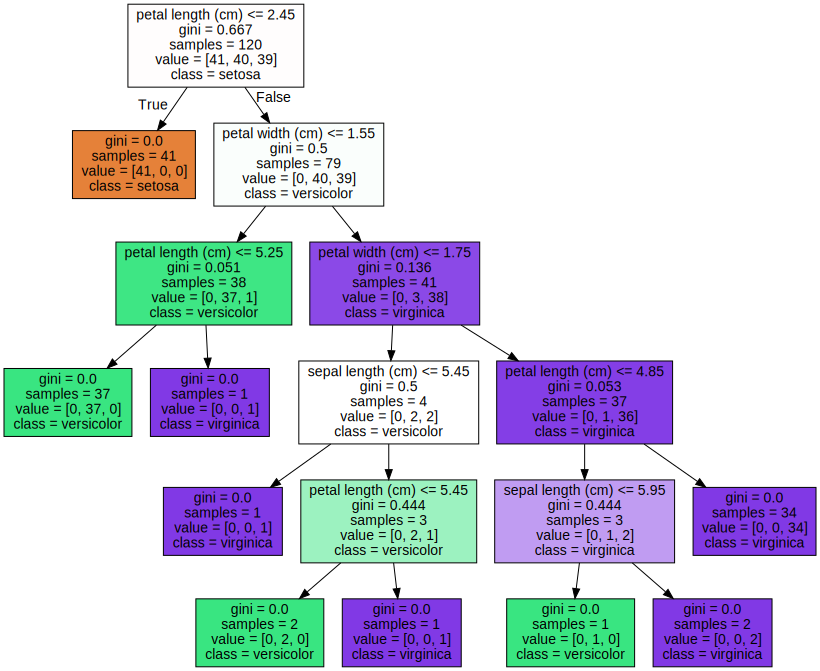

In [ ]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


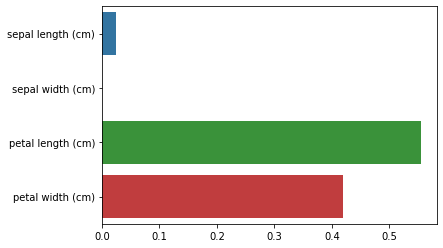

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column별로 시각화 하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

# 결정트리 과적합

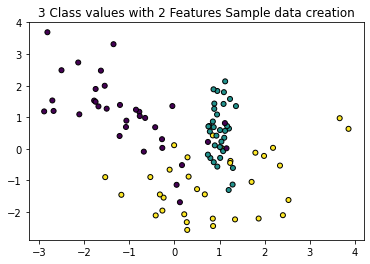

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features =2 , n_redundant = 0, n_informative = 2, 
                                           n_classes = 3, n_clusters_per_class = 1, random_state = 0)
                                           
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, edgecolor = 'k')

In [ ]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

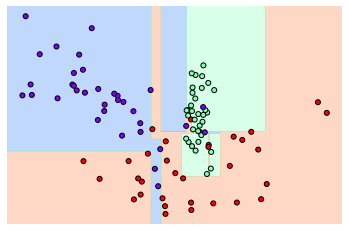

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

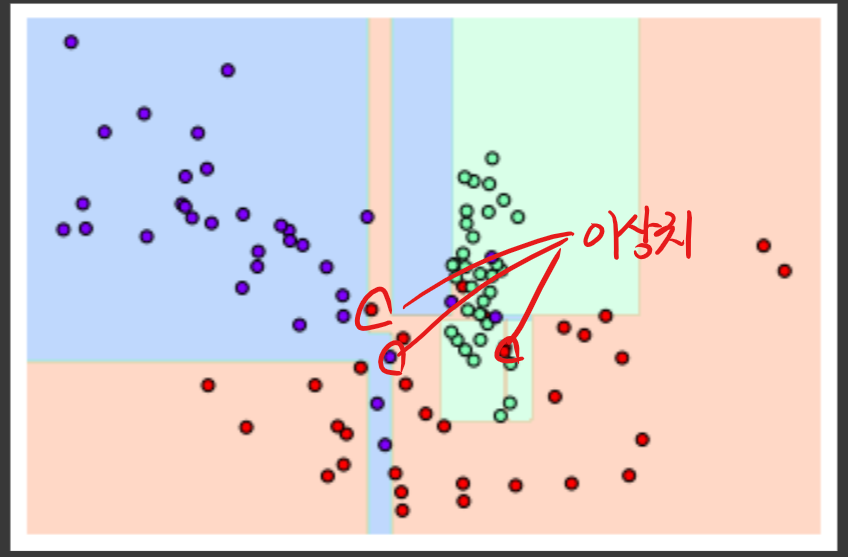

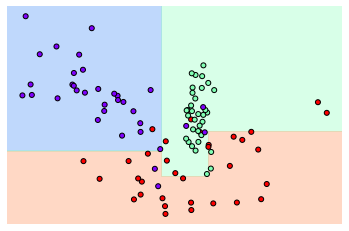

In [ ]:
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6, random_state = 156).fit(X_features, y_labels) # 조금 덜 세분화 시킴 (Overfitting 방지)
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
dkfjk